In [2]:
### This script prepare external data(SKEML28, COLO704) scatter plots and Venn diagrams for figure.py
# Author: Yiyun
import pandas as pd
from os.path import join
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib_venn import venn2

In [8]:
### Load and read PC9 and To data
skmel28_dir = '../out/21.0705 Lx SKMEL28/L200only_reg_rf_boruta/anlyz'
colo704_dir = '../out/21.0705 Lx COLO704/L200only_reg_rf_boruta/anlyz'

df_skmel28 = pickle.load(open(join(skmel28_dir,'y_compr_ext.pkl'),'rb'))
df_colo704 = pickle.load(open(join(colo704_dir,'y_compr_ext.pkl'),'rb'))

In [9]:
df_skmel28 = pd.concat([df_skmel28['actual'],df_skmel28['predicted']], axis = 0).T
df_skmel28.columns = ['actual','predicted']
df_colo704 = pd.concat([df_colo704['actual'],df_colo704['predicted']], axis = 0).T
df_colo704.columns = ['actual','predicted']

Pearson Correlation Coefficient for SKMEL28 actual and predicted is:0.5619917758979163


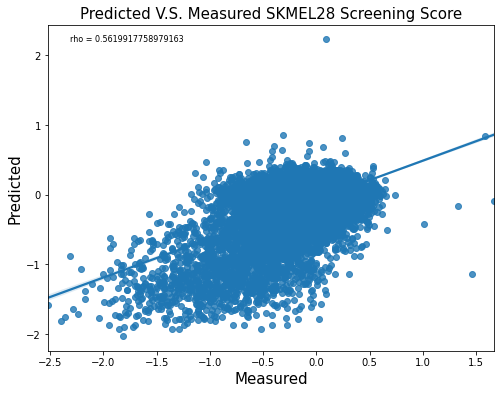

In [11]:
### Plot scatter plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax = sns.regplot(x='actual', y='predicted',data = df_skmel28)
corr_pear = pearsonr(df_skmel28['actual'], df_skmel28['predicted'])[0]
ax.text(0.05,0.95,'rho = '+str(corr_pear),transform=ax.transAxes,fontsize = 8) #add text
ax.set_title('Predicted V.S. Measured SKMEL28 Screening Score', fontsize = 15)
ax.set_xlabel('Measured', fontsize=15);ax.set_ylabel('Predicted', fontsize=15)
print(f'Pearson Correlation Coefficient for SKMEL28 actual and predicted is:{corr_pear}')

Pearson Correlation Coefficient for COLO704 actual and predicted is:0.6214678070814895


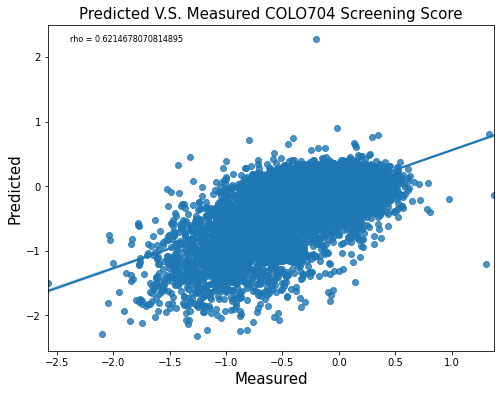

In [12]:
### Plot scatter plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax = sns.regplot(x='actual', y='predicted',data = df_colo704)
corr_pear = pearsonr(df_colo704['actual'], df_colo704['predicted'])[0]
ax.text(0.05,0.95,'rho = '+str(corr_pear),transform=ax.transAxes,fontsize = 8) #add text
ax.set_title('Predicted V.S. Measured COLO704 Screening Score', fontsize = 15)
ax.set_xlabel('Measured', fontsize=15);ax.set_ylabel('Predicted', fontsize=15)
# plt.savefig('COLO704_exp_pred.pdf')
print(f'Pearson Correlation Coefficient for COLO704 actual and predicted is:{corr_pear}')